## Qué es una variable?

Una variable es una característica, número o cantidad que puede ser medida o contada. Son llamadas 'variables' porque el valor que toman puede variar.  Los siguientes son ejemplos de variables:

- Edad (21, 35, 62, ...)
- Género (masculino, femenino)
- Salario (GBP 20,000, GBP 35,000, GBP 45,000, ...)
- Precio inmueble (GBP 350,000, GBP 570,000, ...)
- País de nacimiento (China, Rusia, Costa Rica, ...)
- Color ojos (negro, verde, azul, ...)
- Marca de Vehículo (Ford, Volkswagen, ...)

La mayoría de las variables puede ser clasificada en uno de los siguientes grupos:

- **Variables Numéricas** 
- **Variables Categóricas**

===================================================================================


## Variables Categóricas

Los valores de una variable categórica se seleccionan de un grupo de categorías distintas, tambien conocidas como etiquetas. Las variables categóricas pueden ser variables de cadena ( cadenas de caracteres), por ejemplo estado civil (soltero, casado, divorciado o viudo) o variables numéricas que utilizan códigos numéricos para representar categorías (por ejemplo género, 0 = masculino y 1 = femenino).

Otros ejemplos incluyen: 
 
- Propósito del préstamo (consolidad deudas, compra vehículo, costos boda, ...)
- Proveedor de red celular (Vodafone, Orange, ...)
- Código Postal 

Las variables categóricas pueden ser:

- **Variables Ordinales**
- **Variables Nominales**

### Variables Ordinales

Variables ordinales son variables categóricas en las cuales sus valores representan categorías con alguna clasificación intrínseca o que toman una escala establecida.  Por ejemplo: 

- Calificacíon en una evaluación estudiantil (A, B, C o D).
- Días de la semana, Lunes = 1 y Domingo = 7.
- Nivel de educación, con las categorías: Primaria, Secundaria, Pregrado, Maestría y Doctorado rangos desde 1 a 5


### Variables Nominales

En una variable nominal, sus valores representan categorías que no obedecen a una clasificación intrínseca o un orden lógico. Por ejemplo, país the nacimiento, con valores como Colombia, Argentina, Inglaterra, Alemania, etc., es nominal. Otros ejemplos de variables nominales include:

- Color vehículo (negro, azul, verde, ...)
- Marca de Vehículo (Citroen, Peugeot, ...)
- Ciudad (Manchester, London, Chester, ...)

No hay nada que indique un orden intrínsico en las categorías, y en principio, todas son iguales.

**Para considerar:**

Algunas variables categóricas estan codificadas como números cuando los datos son generados y guardados (ej. género puede codificado como 0 para masculino y 1 para femenino). La variable sigue siendo categórica, a pesar de que números fueron usados.

Igualmente, personas que responden una encuesta pueden ser codificados con un número que los identifica de forma única (por ejemplo para evitar guardar información personal por cuestiones de confidencialidad). Este número es realmente una categoría, y la variable por lo tanto categórica. El número no tiene ningún significado, aparte de hacer posible la identificación única de la observación ( en este caso de la persona encuestada).

Idealmente, cuando trabajamos con un conjunto de datos en un escenario de negocios, los datos están acompanados de un diccionario que indica si los ´numero en una variable deben ser considerados como categorías o como valores númericos. Y si los números representan categorías, el diccionario explicaría que representa cada uno de los valores en la variable. 

=============================================================================

## En este demo: Préstamos Peer-to-peer (P2P)

En este demo, usaremos datos de la companía financiera especializada en préstamos peer-to-peer llamada **Lending Club** para examinar variables categóricas nominales.

- Para descargar los datos, por favor referirse a la sección de **Datos** de la **Clase 1** del curso.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Definición de variables:
#-------------------------
# loan_status: estado del préstamo (paid (pagado), defaulted (pago no reembolsado), etc)
# purpose: propósito/intención de uso del préstamo 
# home_ownership: si el prestamista es dueño o arrienda la propiedad que habita.

use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

# Carguemos los datos con solo unas columnas y unas pocas filas para 
# facilitar y reducir el tiempo que toma correr el demo.

data = pd.read_csv('../loan.csv', usecols=use_cols).sample(
    10000, random_state=44)  # fijar la semilla o "seed" para poder reproducir resultados

data.head()

,id,home_ownership,loan_status,purpose
131079,5554979,RENT,Current,debt_consolidation
384935,16552323,OWN,Current,car
73585,8185454,RENT,Fully Paid,credit_card
660814,56180166,RENT,Current,debt_consolidation
349757,16772363,RENT,Current,credit_card


In [3]:
# Examinemos los valores de la variable home_ownership
# este es el valor del préstamo requerido por el prestamista
# en US dólares americanos

# esta variable es continua, y puede en principio tomar cualquier valor
# let's inspect the variable home ownership,
# si el prestamista posee o arrienda la propiedad que habita

data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

Text(0, 0.5, 'Número de clientes')

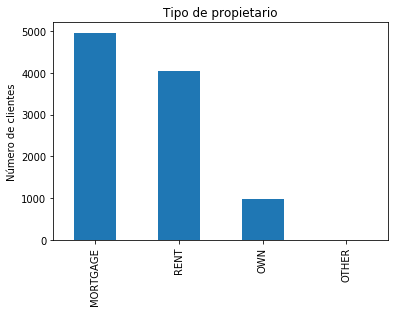

In [4]:
# Creemos un gráfico de barras, con el número de préstamistas
# por cada una de las categorías de home_ownership

# El siguiente código cuenta el número de observaciones (prestamistas) 
# en cada una de las categorías y crea un gráfico de barras.

fig = data['home_ownership'].value_counts().plot.bar()
fig.set_title('Tipo de propietario')
fig.set_ylabel('Número de clientes')

La mayoría de los prestamistas son dueños de sus casas pero todavia pagan una hipoteca (MORTGAGE) o arriendan la propiedad en la que viven (RENT). Algunos pocos prestamistas son dueños de su casa completamente (OWN). La categoría 'OTHER' parece estar vacía. Para asegurarnos completamente, imprimamos los números:

In [5]:
data['home_ownership'].value_counts()

MORTGAGE    4957
RENT        4055
OWN          986
OTHER          2
Name: home_ownership, dtype: int64

Hay dos prestamistas que tienen otros acuerdos para la propiedad en la que viven. Por ejemplo, puden vivir con sus padres o en un hotel.

In [6]:
# La variable "purpose" es otra variable categórica
# que indica el propósito/intención de uso del préstamo 
# por ejemplo para hacer arreglos en la casa or consolidar otras deudas.

data.purpose.unique()

array(['debt_consolidation', 'car', 'credit_card', 'small_business',
       'house', 'moving', 'other', 'home_improvement', 'medical',
       'major_purchase', 'vacation', 'educational', 'wedding',
       'renewable_energy'], dtype=object)

Exploremos algunos valores:
- 'debt_consolidation' préstamo se va a usar consolidar otras deudas previamente adquiridas 
- 'car' comprar un vehículo
- 'home_improvement' mejores/reparaciones en la casa

Esto nos da una idea de la intención de uso del préstamo.

Text(0, 0.5, 'Número de clientes')

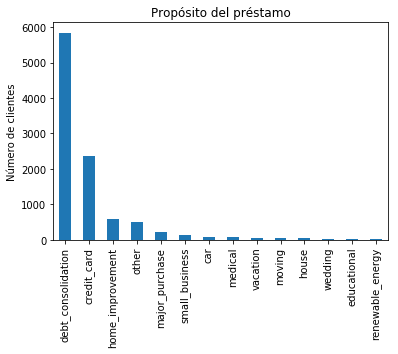

In [7]:
# Creemos un gráfico de barras, con el número de préstamistas
# por cada una de las categorías

# El siguiente código cuenta el número de observaciones (prestamistas) 
# en cada una de las categorías y crea un gráfico de barras.

fig = data['purpose'].value_counts().plot.bar()
fig.set_title('Propósito del préstamo')
fig.set_ylabel('Número de clientes')

La mayoría de los prestamistas tienen la intención de usar el préstamo para consolidar deudas previamente adquiridas 'debt consolidation' o para pagar sus tarjetas de crédito 'credit cards'. Esto es bastante común, ya que los prestamistas prefieren consolidar todas sus deudas en una sola, en este caso usando el préstamo que toman del Lending Club. El préstamo usualmente les da la facilidad de ya sea tasas de interés mas bajas comparadas con las tarjetas de crédito y por ejemplo plazos mas largos para pagar. 

In [8]:
# Miremos otra variable categórica loan status",
# que representa el estado del préstamo si esta activo 'current', pagado 'paid', incumplido 'defaulted', etc)
# entre otros.

data.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (31-120 days)', 'Issued', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (16-30 days)'], dtype=object)

Text(0, 0.5, 'Número de clientes')

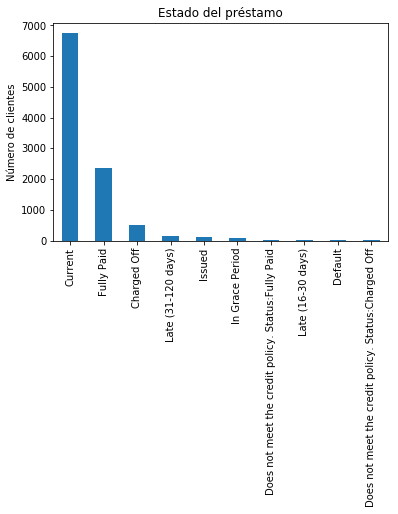

In [9]:
# Creemos un gráfico de barras, con el número de préstamistas
# por cada una de las categorías

fig = data['loan_status'].value_counts().plot.bar()
fig.set_title('Estado del préstamo')
fig.set_ylabel('Número de clientes')

Podemos ver que la mayoría de los préstamos estan todavía activos 'current' y un gran número han sido completamente pagos 'Fully paid'. La siguientes categorías tiene el siguiente significado:

- Late (16-30 days): cliente hizo un pago retrasado 16-30 días
- Late (31-120 days): cliente esta retrasado en sus pagos mas de un mes (31-120 días)
- Charged off: la companía declaró que no será posible recuper el dinero del préstamo 
- Issued: el préstamo fue concedido pero el dinero no ha sido entregado al prestamista
- In Grace Period: ventana de tiempo acordada con el cliente para realizar el siguiente pago, usualmente, cuando el prestamista esta atrasado con sus pagos. 

In [10]:
# Para terminar,  miremos a una variable que es numérica 
# pero cuyos valores no tienen un significado real, se usan mas como identificadores

data['id'].head()

131079     5554979
384935    16552323
73585      8185454
660814    56180166
349757    16772363
Name: id, dtype: int64

Cada id representa un cliente. Este número es asignado para identificar
el cliente si se necesita, al mismo tiempo, que se asegura confidencialidad y protección de los datos. 

In [11]:
# La variable tiene tantos valores (ids) como clientes
# en este caso 10,000, 

# recuerda que inicialmente solamente cargamos 10,000 filas/clientes 
# del conjunto de datos inicial.

len(data['id'].unique())

10000


**Esto es todo por este demo, esperamos lo hayan disfrutado y nos vemos en el siguiente. **